In [46]:
import pandas as pd
import numpy as np
import seaborn as sns

In [47]:
df =  pd.read_csv('female_comprehensive_final_3Nov.csv')
df['topic_x'] = df['topic'].apply(lambda x: 'T'+str(x))
dm =  pd.read_csv('male_comprehensive_final_3Nov.csv')
dm['topic_x'] = dm['topic'].apply(lambda x: 'T'+str(x))
df = df.append(dm)

/var/folders/lk/c66jcxc517j4m73kkh93rvwr0000gn/T/ipykernel_14541/2412783631.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dm)


In [48]:
dm

,Unnamed: 0.3,Unnamed: 1.1,Unnamed: 0.2,Unnamed: 0,Unnamed: 1,Unnamed: 0.1,title_x,artist_x,year_x,key,...,is_band,genre,tokens,processed_tokens,topic,unique_tokens,tokens_list,set_size,lang,topic_x
0,2,2,2,6,5,2,heartaches by the number,guy mitchell,1959,heartaches by the numberguy mitchell,...,False,"{""adult standards"",""deep adult standards"",""bri...","['heartaches', 'by', 'the', 'number', 'trouble...","['heartache', 'number', 'trouble', 'score', 'e...",3,"{""'said'"", ""'never'"", ""'trouble'"", ""'one'"", ""'...","[""'heartache'"", ""'number'"", ""'trouble'"", ""'sco...",38,en,T3
1,3,3,3,7,6,3,kansas city,wilbert harrison,1959,kansas citywilbert harrison,...,False,"{""rhythm and blues"",R&B/Soul,Rock,R&B/Soul,roc...","['i', 'm', 'going', 'to', 'kansas', 'city', 'k...","['going', 'kansa', 'city', 'kansa', 'city', 'c...",4,"{""'come'"", ""'crazy'"", ""'standing'"", ""'kansa'"",...","[""'going'"", ""'kansa'"", ""'city'"", ""'kansa'"", ""'...",35,en,T4
2,6,6,9,13,12,442,kansas city,hank ballard and the midnighters,1959,kansas cityhank ballard and the midnighters,...,False,"{""rhythm and blues"",R&B/Soul,Rock,R&B/Soul,roc...","['i', 'm', 'going', 'to', 'kansas', 'city', 'k...","['going', 'kansa', 'city', 'kansa', 'city', 'c...",1,"{""'come'"", ""'crazy'"", ""'standing'"", ""'kansa'"",...","[""'going'"", ""'kansa'"", ""'city'"", ""'kansa'"", ""'...",44,en,T1
3,9,9,12,16,15,4,lonely boy,paul anka,1959,lonely boypaul anka,...,False,"{""canadian pop"",""brill building pop"",""adult st...","['i', 'm', 'just', 'a', 'lonely', 'boy', 'lone...","['lonely', 'boy', 'lonely', 'blue', 'alone', '...",3,"{""'blue'"", ""'give'"", ""'lonely'"", ""'moment'"", ""...","[""'lonely'"", ""'boy'"", ""'lonely'"", ""'blue'"", ""'...",34,en,T3
4,10,10,13,17,16,5,mack the knife,bobby darin,1959,mack the knifebobby darin,...,False,"{Pop,""brill building pop"",rock-and-roll,lounge...","['oh', 'the', 'shark', 'babe', 'has', 'such', ...","['shark', 'babe', 'teeth', 'dear', 'show', 'pe...",1,"{""'walk'"", ""'never'"", ""'right'"", ""'scarlet'"", ...","[""'shark'"", ""'babe'"", ""'teeth'"", ""'dear'"", ""'s...",86,en,T1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10961,23767,23989,27405,30992,30991,30013,7 days,youngboy never broke again,2022,7 daysyoungboy never broke again,...,False,"{""baton rouge rap"",Hip-Hop/Rap,insights_high_p...","['7', 'Days', 'Lyrics', 'Intro', 'I', 'got', '...","['day', 'intro', 'got', 'hitman', 'beat', 'lov...",2,"{""'crash'"", ""'told'"", ""'lord'"", ""'one'"", ""'doi...","[""'day'"", ""'intro'"", ""'got'"", ""'hitman'"", ""'be...",156,en,T2
10962,23768,23990,27406,30993,30992,30014,brambleton,pusha t,2022,brambletonpusha t,...,False,"{""virginia hip hop"",""gangster rap"",Hip-Hop/Rap...","['Brambleton', 'Lyrics', 'Intro', 'Pusha', 'T'...","['brambleton', 'intro', 'pusha', 'pharrell', '...",2,"{""'racing'"", ""'10embed'"", ""'never'"", ""'champag...","[""'brambleton'"", ""'intro'"", ""'pusha'"", ""'pharr...",160,en,T2
10963,23769,23991,27407,30994,30993,30015,"burn, burn, burn",zach bryan,2022,"burn, burn, burnzach bryan",...,False,"{Country,""oklahoma country"",Pop,Country,Singer...","['Burn', 'Burn', 'Burn', 'Lyrics', 'Verse', '1...","['burn', 'burn', 'burn', 'well', 'everyone', '...",1,"{""'poem'"", ""'departed'"", ""'muscle'"", ""'lonely'...","[""'burn'"", ""'burn'"", ""'burn'"", ""'well'"", ""'eve...",147,en,T1
10964,23770,23993,27409,30996,30995,30017,down home,jimmie allen,2022,down homejimmie allen,...,False,"{Country,Country,""black americana"",""black amer...","['down', 'home', 'Lyrics', 'Verse', '1', 'I', ...","['home', 'bet', 'makin', 'new', 'friend', 'pre...",3,"{""'met'"", ""'big'"", ""'daughter'"", ""'girl'"", ""'r...","[""'home'"", ""'bet'"", ""'makin'"", ""'new'"", ""'frie...",94,en,T3


In [49]:
extractf = df[['year_x','processed_tokens','decade','topic_x']]
extractf['decade'] = extractf['year_x'].apply(lambda x : str(x)[2]+'0s')
extractf['decade'].isna().sum()
extractf

/var/folders/lk/c66jcxc517j4m73kkh93rvwr0000gn/T/ipykernel_14541/1582958187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extractf['decade'] = extractf['year_x'].apply(lambda x : str(x)[2]+'0s')


,year_x,processed_tokens,decade,topic_x
0,1959,"['hook', 'love', 'porgy', 'let', 'take', 'let'...",50s,T4
1,1959,"['lonely', 'one', 'love', 'lonely', 'soul', 's...",50s,T3
2,1960,"['ueber', 'rio', 'und', 'shanghai', 'ueber', '...",60s,T3
3,1960,"['made', 'night', 'little', 'brighter', 'where...",60s,T1
4,1960,"['shark', 'pretty', 'teeth', 'dear', 'show', '...",60s,T1
...,...,...,...,...
10961,2022,"['day', 'intro', 'got', 'hitman', 'beat', 'lov...",20s,T2
10962,2022,"['brambleton', 'intro', 'pusha', 'pharrell', '...",20s,T2
10963,2022,"['burn', 'burn', 'burn', 'well', 'everyone', '...",20s,T1
10964,2022,"['home', 'bet', 'makin', 'new', 'friend', 'pre...",20s,T3


In [50]:
extractf['topic_x'].value_counts()
topic_options = extractf['topic_x'].unique()
topic_options = sorted(topic_options)
topic_options

['T1', 'T2', 'T3', 'T4']

In [51]:
decadal_groups = extractf.groupby(by=['decade']).agg('topic_x')
print(decadal_groups)

In [52]:
decade_topic = extractf.groupby(by='decade')[['decade','topic_x']]
decade_topic

In [53]:
decades = extractf['decade'].unique()
decades

array(['50s', '60s', '70s', '80s', '90s', '00s', '10s', '20s'],
      dtype=object)

In [54]:
decade_df = decade_topic.get_group('00s')
decades_final = decade_df.pivot_table(index="topic_x", columns="decade", values="topic_x", aggfunc=np.count_nonzero)
decade_df.head()
decades_final.loc['T1']

decade
00s    592
Name: T1, dtype: int64

In [55]:
topic_counts =[[],[],[],[]]
for i in range(len(topic_options)):
    print(topic_options[i], topic_counts[i])
for decade in decades:
    # print(decade)
    decade_df = decade_topic.get_group(decade)
    # print(decade_df)
    decades_final = decade_df.pivot_table(index="topic_x", columns="decade", values="topic_x", aggfunc=np.count_nonzero)
    for i in range(len(topic_options)):
        try:
            topic_counts[i].append(int(decades_final.loc[topic_options[i]])) 
        except:
            topic_counts[i].append(0) 
for i in range(len(topic_options)):
    print(topic_options[i], topic_counts[i])

T1 []
T2 []
T3 []
T4 []
T1 [118, 1308, 1054, 678, 276, 592, 822, 250]
T2 [32, 316, 326, 264, 328, 818, 1594, 818]
T3 [166, 2074, 1754, 1814, 1206, 1736, 1858, 678]
T4 [116, 1128, 946, 928, 640, 558, 912, 174]


In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


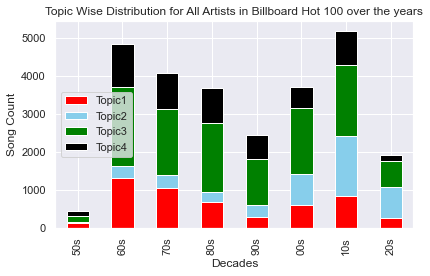

In [57]:
df = pd.DataFrame({'Topic1': topic_counts[0],
                   'Topic2': topic_counts[1],
                   'Topic3': topic_counts[2],
                   'Topic4': topic_counts[3]},
                  index=decades)
                  # create stacked bar chart for monthly temperatures
df.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green','black'])
 
# labels for x & y axis
plt.xlabel('Decades')
plt.ylabel('Song Count')
 
# title of plot
plt.title('Topic Wise Distribution for All Artists in Billboard Hot 100 over the years')
plt.tight_layout()
plt.savefig('all-topics-decades.png', dpi=300)

/var/folders/lk/c66jcxc517j4m73kkh93rvwr0000gn/T/ipykernel_14541/4280425853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perct['Topic1'] = df['Topic1']*100/df['total']
/var/folders/lk/c66jcxc517j4m73kkh93rvwr0000gn/T/ipykernel_14541/4280425853.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perct['Topic2'] = df['Topic2']*100/df['total']
/var/folders/lk/c66jcxc517j4m73kkh93rvwr0000gn/T/ipykernel_14541/4280425853.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

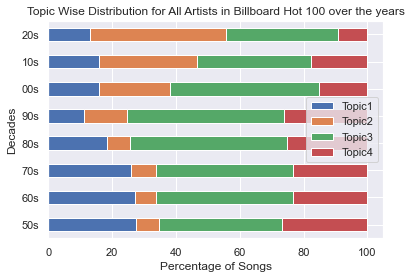

In [58]:
df['total'] =  df['Topic1'] + df['Topic2'] + df['Topic3'] + df['Topic4']
df_perct = df[['Topic1','Topic2','Topic3', 'Topic4']]
df_perct['Topic1'] = df['Topic1']*100/df['total']
df_perct['Topic2'] = df['Topic2']*100/df['total']
df_perct['Topic3'] = df['Topic3']*100/df['total']
df_perct['Topic4'] = 100 - df_perct['Topic1'] - df_perct['Topic2'] - df_perct['Topic3']
df_perct.plot(
    kind = 'barh',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)
df_perct

# labels for x & y axis
plt.ylabel('Decades')
plt.xlabel('Percentage of Songs')
 
# title of plot
plt.title('Topic Wise Distribution for All Artists in Billboard Hot 100 over the years')

plt.savefig('all-topics-decades-perct.png', dpi=300)

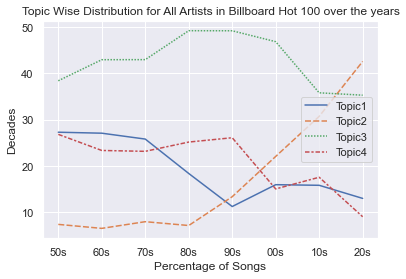

In [59]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.lineplot(data=df_perct)
# labels for x & y axis
# labels for x & y axis
plt.ylabel('Decades')
plt.xlabel('Percentage of Songs')
 
# title of plot
plt.title('Topic Wise Distribution for All Artists in Billboard Hot 100 over the years')

plt.savefig('all-topics-decades-perct-line.png', dpi=300)